In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path=r'images/download9.jpg'

In [3]:
image=cv2.imread(image_path)
input_copy=image.copy()
org_image =cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [4]:
img_gray = cv2.threshold(org_image, 127, 255, cv2.THRESH_BINARY_INV)[1]

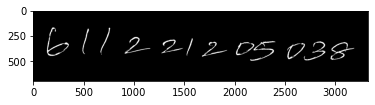

In [5]:
plt.imshow(img_gray, cmap='gray')

In [6]:
inverted_image = cv2.bitwise_not(img_gray)
kernel =np.ones((5,5), np.uint8) 
img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
img_morphex= cv2.bitwise_not(img_morphex)

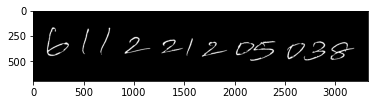

In [7]:
plt.imshow(img_morphex, cmap='gray')

In [8]:
#bin_image = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) [1]
#ret,thres = cv2.threshold(img_morphex, 128, 255, cv2.THRESH_BINARY)
#cv2.floodFill(thres, None, (0, 0), 0)

In [9]:
contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
img_contours = np.zeros(image.shape)

In [11]:
image_copy=img_morphex.copy()

In [12]:
#cv2.drawContours(image_copy, contours, -1, (0,255,0), 3)

In [13]:
cv2.imshow("Current Crop", img_morphex)
cv2.waitKey(0)
cv2.destroyAllWindows()

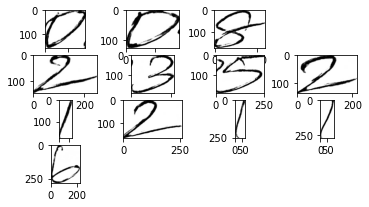

In [14]:
for _, c in enumerate(contours):

    boundRect = cv2.boundingRect(c)

    # Get the bounding rectangle data:
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    rectArea = rectWidth * rectHeight
    
    minArea=500

    # Filter blobs by area:
    if rectArea > minArea :
        color = (0, 255, 0)
        cv2.rectangle(input_copy, (int(rectX), int(rectY)),(int(rectX + rectWidth), int(rectY + rectHeight)),color,  1)
        cv2.imshow("Bounding Boxes", input_copy)
        currentCrop = image[rectY:rectY+rectHeight,rectX:rectX+rectWidth]
        
         
        cv2.imwrite(f'images/rec/{_}.jpg', currentCrop)
        
        plt.subplot(5,4, _+1)
        plt.imshow(currentCrop)
        
        cv2.imshow("Current Crop", currentCrop)
        cv2.waitKey(0)
        cv2.destroyAllWindows()